In [16]:
# for idx in range(0, 9):
#     print(f"kotka{idx}\n")

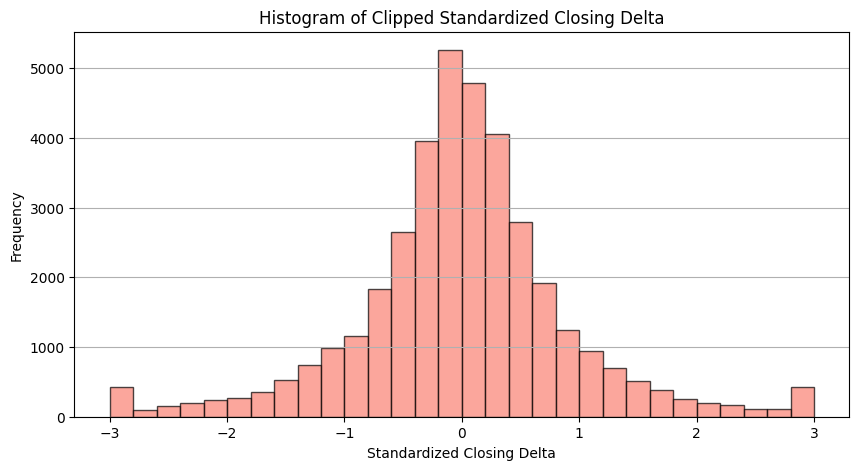

In [17]:
import pandas as pd  # Import the pandas library for data manipulation and analysis
import matplotlib.pyplot as plt  # Import the matplotlib library for plotting

# Read the CSV file containing EUR/USD exchange rate data, using tab as the delimiter
df = pd.read_csv("dataset/EURUSDH4.csv", delimiter="\t")

# Extract the closing prices from the DataFrame
closing = df["<CLOSE>"]

# Calculate the difference between consecutive closing prices and drop any missing values
closing_delta = closing.diff().dropna()

# Standardize the closing delta values to have a mean of 0 and a standard deviation of 1
standardized_closing_delta = (closing_delta - closing_delta.mean()) / closing_delta.std()

# Replace extremes with the minimum and maximum possible values
standardized_closing_delta_clipped = standardized_closing_delta.clip(lower=-3, upper=3)

# Plot the histogram of the clipped standardized closing delta values
plt.figure(figsize=(10, 5))  # Set the figure size for the plot
plt.hist(standardized_closing_delta_clipped, bins=30, color='salmon', edgecolor='black', alpha=0.7)  # Create a histogram
plt.title('Histogram of Clipped Standardized Closing Delta')  # Set the title of the plot
plt.xlabel('Standardized Closing Delta')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.grid(axis='y')  # Add a grid to the y-axis
plt.show()  # Display the plot

In [18]:
# Convert the standardized closing delta values to bins from 0 to 9
# First, we scale the values to the range [0, 9]
bins = 9
scaled_closing_delta = ((standardized_closing_delta_clipped + 3) / 6) * bins  # Scale to [0, 9]
scaled_closing_delta_binned = scaled_closing_delta.round().clip(0, bins)  # Round and clip to ensure values are between 0 and 9

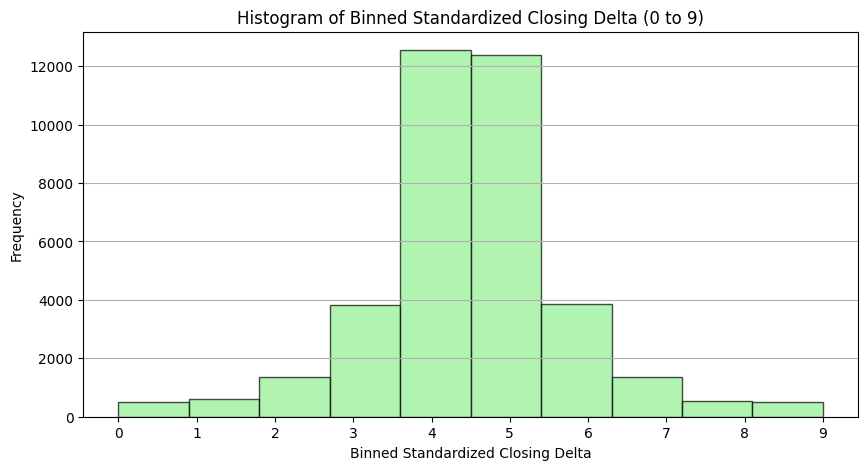

In [19]:
# Plot the histogram of the binned standardized closing delta values
plt.figure(figsize=(10, 5))  # Set the figure size for the plot
plt.hist(scaled_closing_delta_binned, bins=bins + 1, color='lightgreen', edgecolor='black', alpha=0.7)  # Create a histogram
plt.title('Histogram of Binned Standardized Closing Delta (0 to 9)')  # Set the title of the plot
plt.xlabel('Binned Standardized Closing Delta')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.xticks(range(0, bins + 1))  # Set x-ticks to show bins from 0 to 9
plt.grid(axis='y')  # Add a grid to the y-axis
plt.show()  # Display the plot

Counting unique words suggested by my Friend

In [23]:
import numpy as np
# if max_word_size range is from 8 to 10 produced ~100 000 words and ~200 000 sentences
# in range 3 to 5 number of words is ~5000
word_size_low_range = 3
word_size_high_range = 5

# Track unique words using a set
unique_words = set()
num_rows = scaled_closing_delta_binned.shape[0]

# Open both files in write mode using context managers
with (open("dataset/Present_large.txt", "w") as file_present, 
      open("dataset/Future_large.txt", "w") as file_future):

    # Iterate multiple times to generate data
    for repeat in range(0, 5):
        # Define minimum and maximum lengths for sentences
        min_sentences_len = np.random.randint(18, 20)
        max_sentences_len = np.random.randint(40, 50)
        
        # Define the maximum size for individual words
        max_word_size = np.random.randint(word_size_low_range, word_size_high_range)  # Example maximum word size
        
        # Loop through indices starting from min_sentences_len to the total length
        for idx in range(0, num_rows - max_sentences_len):
            # Generate a random integer for the total length of two sentences
            two_sentence_length = np.random.randint(min_sentences_len, max_sentences_len)
            
            # Calculate 40% to 60% of the total sentence length for the present sentence
            present_sentence_length = int(np.random.uniform(0.4, 0.6) * two_sentence_length)
        
            # Split the present_sentence_length into random length words
            present_word_sizes = []
            remaining_length = present_sentence_length
            
            # Continue generating words until the remaining length is exhausted
            while remaining_length > 0:
                word_size = np.random.randint(1, min(remaining_length, max_word_size) + 1)
                present_word_sizes.append(word_size)
                remaining_length -= word_size
            
            # Calculate the remaining length for the future sentence
            future_sentence_len = two_sentence_length - present_sentence_length
            
            # Split the future_sentence_len into random length words
            future_word_sizes = []
            remaining_length = future_sentence_len
            
            # Continue generating words until the remaining length is exhausted
            while remaining_length > 0:
                word_size = np.random.randint(1, min(remaining_length, max_word_size) + 1)
                future_word_sizes.append(word_size)
                remaining_length -= word_size
        
            # Process the sentences
            present_sentence = scaled_closing_delta_binned.iloc[idx:idx+present_sentence_length]
            future_sentence = scaled_closing_delta_binned.iloc[idx+present_sentence_length:idx+two_sentence_length]

            # Words for Present Sentence
            present_sentence_str = ''
            k = 0
            for p_idx in present_word_sizes:
                word = ''.join(str(int(n)) for n in present_sentence.iloc[k:k+p_idx])
                present_sentence_str += (' ' + word) if present_sentence_str else word
                k += p_idx
                unique_words.add(word)  # Add the word to the set of unique words
                
            file_present.write(present_sentence_str + "\n") 
            
            # Words for Future Sentence    
            future_sentence_str = ''
            k = 0
            for p_idx in future_word_sizes:
                word = ''.join(str(int(n)) for n in future_sentence.iloc[k:k+p_idx])
                future_sentence_str += (' ' + word) if future_sentence_str else word
                k += p_idx
                unique_words.add(word)  # Add the word to the set of unique words
            
            file_future.write(future_sentence_str + "\n") 

        print(f"Repeat {repeat} complete.")

print("Finished writing to Present.txt and Future.txt.") 
print(f"Total unique words: {unique_words.__len__()}")

Repeat 0 complete.
Repeat 1 complete.
Repeat 2 complete.
Repeat 3 complete.
Repeat 4 complete.
Finished writing to Present.txt and Future.txt.
Total unique words: 108031
